In [2]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.unicode.east_asian_width', True)

import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE #차원축소

In [3]:
from matplotlib import font_manager, rc
import matplotlib
font_path = '../datasets/malgun.ttf' #내가 쓰고 싶은 폰트 파일 경로로 쓰면 됨. 현재 같은 폴더 안에 있음.
font_name = font_manager.FontProperties(fname=font_path).get_name() #get_name:폰트의 이름을 알려줌.
matplotlib.rcParams['axes.unicode_minus']=False
rc('font', family=font_name)

In [4]:
embedding_model = Word2Vec.load('../datasets/Word2VecModel_cheeseball.model')

In [5]:
key_word = '롯데리아'
sim_word = embedding_model.wv.most_similar(key_word, topn=30)
print(sim_word)

[('맥도날드', 0.4671279788017273), ('버거킹', 0.46248099207878113), ('햄버거', 0.4550844430923462), ('싸이버', 0.42907392978668213), ('맘스터치', 0.424007773399353), ('패스트푸드', 0.4236559271812439), ('핵존맛', 0.4045889377593994), ('양념감자', 0.39288783073425293), ('직하', 0.3910641074180603), ('케찹', 0.39053040742874146), ('어니언', 0.38322240114212036), ('대만', 0.3762912154197693), ('버거', 0.3755495250225067), ('칠리', 0.37130308151245117), ('기념', 0.36510127782821655), ('역대', 0.36399006843566895), ('저녁식사', 0.36007487773895264), ('진리', 0.3547305464744568), ('양미리', 0.3541125953197479), ('최고다', 0.35142430663108826), ('에드', 0.35089462995529175), ('워낙', 0.347960889339447), ('브런치', 0.34722453355789185), ('꼬꼬', 0.34653717279434204), ('오오', 0.34605643153190613), ('따따', 0.34420233964920044), ('치킨너겟', 0.3365415334701538), ('스낵', 0.3352254033088684), ('니지', 0.33428218960762024), ('화려', 0.3329034447669983)]


In [6]:
tokens = []
labels = []
for i in sim_word:
    labels.append(i[0])
    tokens.append(embedding_model[i[0]])

c:\users\024\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [7]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)

In [8]:
df_tokens = pd.DataFrame(tokens)
df_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.264831,0.063453,0.066216,-0.171448,-0.657488,0.214506,0.416115,0.132087,0.241951,0.222727,-0.158184,0.483996,-0.237325,-0.088791,0.011651,-0.335379,-0.230409,-0.350258,-0.152435,0.469792,-0.397732,0.330429,0.054606,-0.364382,0.668556,0.136528,0.393686,0.089285,0.286971,-0.502807,-0.488068,0.423422,-0.880491,0.457127,-0.663895,-0.205128,0.316597,0.091758,-0.448400,-0.696770,-0.071472,0.218101,-0.037847,-0.196713,-0.213082,-0.005446,0.135374,-0.039707,0.115129,0.294300,-0.377904,0.188610,0.063740,-0.541391,0.442472,0.535234,-0.282226,0.567649,0.329583,0.322435,0.006560,-0.140954,0.082725,0.194445,-0.371144,-0.169821,-0.680416,-0.019679,0.078487,0.184653,-0.620535,0.075817,0.079585,0.401853,0.258161,0.580689,0.007461,-0.701776,0.411802,0.082460,0.632474,-0.021863,-0.036462,0.465226,0.092160,-0.168447,-0.176484,-0.496415,0.239442,0.243963,-0.149002,0.177485,-0.097823,0.300337,0.522259,-0.267000,-0.713609,-0.215241,0.121559,-0.618773
1,0.094704,0.044852,0.149838,-0.161750,-0.497807,0.262450,0.107988,0.245136,0.357135,0.265257,-0.101983,0.154907,-0.174350,-0.173024,0.120197,-0.260918,-0.405834,-0.417232,-0.144544,0.458179,-0.460391,0.306897,-0.094694,-0.493761,0.510775,0.100084,0.450686,0.316967,0.362070,-0.578876,-0.376324,0.220107,-0.641031,0.429107,-0.682750,-0.272820,-0.020880,-0.127251,-0.351911,-0.322922,-0.118835,0.064937,0.162161,-0.141323,-0.055800,0.201761,0.042161,0.047955,-0.010328,0.172505,-0.591515,0.305182,0.032940,-0.401212,0.442342,0.218689,-0.257031,0.155055,0.071053,0.324943,0.155005,-0.209631,-0.028525,0.361974,-0.433857,-0.125342,-0.545246,-0.236482,0.210044,0.250077,-0.490993,0.005898,0.050350,0.327425,0.322324,0.221558,-0.000002,-0.642344,0.328231,-0.075113,0.550134,-0.098304,-0.117564,0.244877,-0.034163,-0.004184,-0.042261,-0.445794,0.114956,0.480918,-0.209013,0.189991,-0.073847,0.121098,0.394782,-0.247614,-0.516375,-0.000525,0.193567,-0.403928
2,0.035496,-0.233505,0.236338,-0.411485,-0.662315,0.023001,0.787926,0.343498,-0.107627,-0.228588,-0.307599,0.660169,-0.500758,-0.189223,-0.384170,-0.234796,-0.047665,-0.728582,0.046771,0.224074,-0.504259,0.179461,0.286804,-0.511708,0.704529,0.070499,0.557965,0.053731,0.441373,-0.825060,-0.732263,0.390932,-1.128707,0.545604,-1.296648,-0.021261,0.574647,0.210028,-0.860140,-1.211353,-0.160535,0.216386,0.125367,-0.381727,-0.476551,-0.093107,-0.012259,0.157172,0.239024,0.454669,-0.611708,0.371696,0.148288,-0.333110,0.524649,0.435134,-0.135569,0.558029,0.372950,-0.027421,-0.317428,-0.228805,0.158176,0.450235,-0.769761,-0.150283,-0.874281,0.039800,0.532647,0.353480,-1.033419,-0.119920,-0.300733,0.191637,0.283083,0.503846,-0.282666,-0.666122,0.643358,0.106953,1.006703,0.035542,-0.289683,0.566482,0.130632,-0.626096,-0.291386,-0.572846,-0.045696,0.452649,-0.047780,0.142234,-0.142738,-0.027858,0.316099,-0.555410,-0.714163,-0.373363,0.203826,-0.569749
3,-0.143401,0.165458,-0.202189,-0.039869,-0.710371,0.050695,0.646389,0.226168,0.260069,0.442506,-0.156660,0.305325,-0.040871,-0.094698,-0.543343,-0.769054,-0.095772,-0.549618,-0.091204,0.444281,-0.583122,0.548680,-0.264042,-0.227456,1.177301,0.325781,0.655163,-0.154181,0.566673,-0.508848,-0.484327,0.520487,-0.929551,0.524356,-0.620706,-0.027320,0.109638,0.146690,-0.304325,-0.700534,-0.331143,0.099130,-0.575434,0.068860,-0.350780,0.372879,-0.132092,-0.311986,0.083883,0.189140,-0.161986,0.416132,0.210865,-0.595016,0.676300,0.485494,-0.222476,0.576007,0.475670,0.629561,0.137971,-0.212836,0.090378,0.107753,-0.441333,-0.443643,-0.749191,0.037579,0.054949,0.152407,-0.273138,0.263969,0.049918,0.490732,0.205641,0.710456,0.185348,-0.495184,0.424923,0.392961,0.647265,-0.188331,-0.063675,0.622195,0.073376,-0.066156,-0.400040,-0.536582,0.251460,0.404791,-0

In [9]:
#100차원 벡터값을 2차원으로 차원축소하여 시각화
new_values = tsne_model.fit_transform(df_tokens)
print(new_values[0])
print(type(new_values))

[  58.79618 -288.63437]
<class 'numpy.ndarray'>


In [10]:
df_xy = pd.DataFrame({'words':labels, 'x':new_values[:,0], 'y':new_values[:,1]})
print(df_xy.head())

        words           x           y
0      네고왕   58.796181 -288.634369
1  황금올리브    7.274969   -8.270702
2      황광희 -460.849487  -24.143713
3        광희  -72.291550  115.683319
4        고왕 -122.595009  -25.539860


In [11]:
df_xy.loc[df_xy.shape[0]] = (key_word, 0, 0)
print(df_xy.tail()) 

         words           x           y
26       Fried  218.390396 -226.943390
27      올리브 -198.186844   91.042007
28        skin   56.675201  124.193779
29  생일케이크  -50.608551  407.879944
30      비비큐    0.000000    0.000000


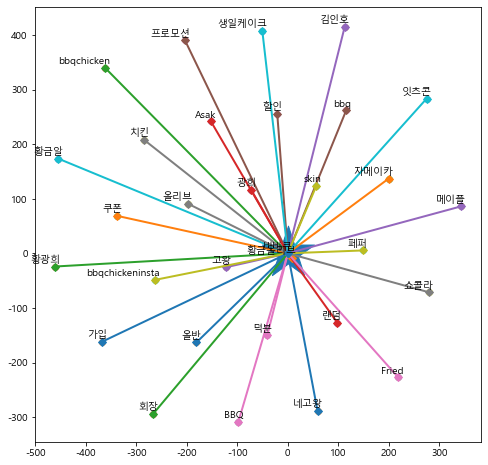

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(0,0,s=3000, marker='*')
for i in range(len(df_xy.x)):
    a = df_xy.loc[[i, 30], :]
    plt.plot(a.x, a.y, '-D', linewidth=2)
    plt.scatter(df_xy.x[i], df_xy.y[i])
    plt.annotate(df_xy.words[i], xy=(df_xy.x[i], df_xy.y[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
plt.scatter
plt.show()